# IBM Data Science Professional Cerificate

## Applied Data Science Capstone Project Notebook

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [4]:
path = 'C:/Users/gabisro/Desktop/Coursera_IBM_Data_Science/9_Capstone_Project/DATA/Canadian data/NCDB_1999_to_2014.csv'
df = pd.read_csv(path) 

C:\Users\gabisro\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Show first 5 rows of the dataframe
print("The first 5 rows of the dataframe") 
df.head()

The first 5 rows of the dataframe


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


### Data cleaning and pre-processing

In [6]:
# Show column names
print(df.columns)

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER'],
      dtype='object')


In [7]:
# Features that from business point of view not needed for the analysis will be dropped: 
# from colission level data: year of the collision 
# from vehicle level data: vehicle id
# from person level data: all 
df1 = df.drop(columns = ['C_YEAR', 'C_VEHS', 'V_ID', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE','P_USER'])
df1.head()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR
0,1,1,20,2,34,UU,1,5,3,03,06,1990
1,1,1,20,2,34,UU,1,5,3,03,01,1987
2,1,1,20,2,34,UU,1,5,3,03,01,1987
3,1,1,08,2,01,UU,5,3,6,18,01,1986
4,1,1,08,2,01,UU,5,3,6,18,NN,NNNN


In [8]:
# Statistical summory of each column 
df1.describe(include = 'all')

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR
count,5860405.0,5860405,5860405,5.860405e+06,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405
unique,17.0,15,25,NaN,20,12,9,11,8,19,20,116
top,8.0,5,16,NaN,21,02,1,1,1,18,01,UUUU
freq,547045.0,516084,519601,NaN,1771212,2746752,4074538,3846162,4162359,3068048,4827390,324122
mean,NaN,NaN,NaN,1.983170e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.286357e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Info of dataframe 
df1.info

<bound method DataFrame.info of         C_MNTH C_WDAY C_HOUR  C_SEV C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF  \
0            1      1     20      2     34     UU      1      5      3     03   
1            1      1     20      2     34     UU      1      5      3     03   
2            1      1     20      2     34     UU      1      5      3     03   
3            1      1     08      2     01     UU      5      3      6     18   
4            1      1     08      2     01     UU      5      3      6     18   
5            1      1     17      2     QQ     QQ      1      2      1     01   
6            1      1     17      2     QQ     QQ      1      2      1     01   
7            1      1     17      2     QQ     QQ      1      2      1     01   
8            1      1     17      2     QQ     QQ      1      2      1     01   
9            1      1     15      2     04     UU      1      5      U     UU   
10           1      1     15      2     04     UU      1      5      U     UU

In [28]:
# In order to simplify identifing of missing values all of them should be set to the same label 

# replace "UU" to NaN
df1.replace("UU", np.nan, inplace = True)

# replace "XX" to NaN
df1.replace("XX", np.nan, inplace = True)

# replace "U" to NaN
df1.replace("U", np.nan, inplace = True)

# replace "X" to NaN
df1.replace("X", np.nan, inplace = True)

# replace "QQ" to NaN
df1.replace("QQ", np.nan, inplace = True)

# replace "Q" to NaN
df1.replace("Q", np.nan, inplace = True)

# replace "NN" to NaN
df1.replace("NN", np.nan, inplace = True)

# replace "NNNN" to NaN
df1.replace("NNNN", np.nan, inplace = True)

# replace "UUUU" to NaN
df1.replace("UUUU", np.nan, inplace = True)

# replace "XXXX" to NaN
df1.replace("XXXX", np.nan, inplace = True)

In [29]:
missing_data = df1.isnull()
missing_data.head(5)

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

C_MNTH
False    4056698
Name: C_MNTH, dtype: int64

C_WDAY
False    4056698
Name: C_WDAY, dtype: int64

C_HOUR
False    4056698
Name: C_HOUR, dtype: int64

C_SEV
False    4056698
Name: C_SEV, dtype: int64

C_CONF
False    4056698
Name: C_CONF, dtype: int64

C_RCFG
False    4056698
Name: C_RCFG, dtype: int64

C_WTHR
False    4056698
Name: C_WTHR, dtype: int64

C_RSUR
False    4056698
Name: C_RSUR, dtype: int64

C_RALN
False    4056698
Name: C_RALN, dtype: int64

C_TRAF
False    4056698
Name: C_TRAF, dtype: int64

V_TYPE
False    4054430
True        2268
Name: V_TYPE, dtype: int64

V_YEAR
False    4056698
Name: V_YEAR, dtype: int64



In [31]:
# Drop all rows containing at least one NaN
df1.dropna(axis=0, inplace=True)

# Reset index, because we droped rows
df1.reset_index(drop=True, inplace=True)

In [32]:
df1.head(5)

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR
0,1,1,09,2,34,02,1,1,1,01,01,1992
1,1,1,09,2,34,02,1,1,1,01,01,1992
2,1,1,09,2,34,02,1,1,1,01,01,1992
3,1,1,20,2,03,03,1,1,3,05,01,1988
4,1,1,05,2,01,02,3,2,4,18,06,1995


In [33]:
# Data types 
print(df1.dtypes)

C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_TYPE    object
V_YEAR    object
dtype: object


In [37]:
# Convert data types to proper data format
df1[["C_MNTH","C_WDAY","C_HOUR","C_CONF","C_RCFG","C_WTHR","C_RSUR","C_RALN","C_TRAF","V_TYPE","V_YEAR"]] = df1[["C_MNTH","C_WDAY","C_HOUR","C_CONF","C_RCFG","C_WTHR","C_RSUR","C_RALN","C_TRAF","V_TYPE","V_YEAR"]].astype("int")
print(df1.dtypes)

C_MNTH    int32
C_WDAY    int32
C_HOUR    int32
C_SEV     int64
C_CONF    int32
C_RCFG    int32
C_WTHR    int32
C_RSUR    int32
C_RALN    int32
C_TRAF    int32
V_TYPE    int32
V_YEAR    int32
dtype: object


### Exploratory Data Analysis

In [41]:
# Exploration of target variable 
df1['C_SEV'].value_counts()

2    3987571
1      66859
Name: C_SEV, dtype: int64

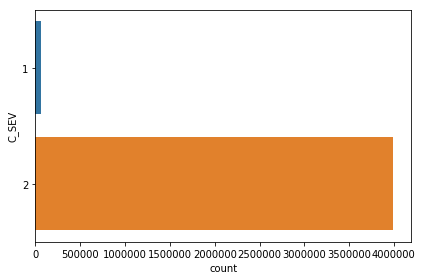

In [43]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y = "C_SEV" , data = df1)
plt.tight_layout()

In [38]:
# Correlation matrix
df1.corr()

,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_TYPE,V_YEAR
C_MNTH,1.000000,0.003271,0.019978,-0.005522,-0.014072,-0.003599,-0.028497,-0.104871,-0.001989,0.001889,0.004441,0.032032
C_WDAY,0.003271,1.000000,-0.011472,-0.018524,-0.032346,-0.020375,0.006574,-0.003145,0.026805,0.022627,-0.017240,-0.013724
C_HOUR,0.019978,-0.011472,1.000000,0.019147,0.068649,0.026409,-0.020838,-0.049024,-0.037152,-0.036438,-0.008977,-0.010854
C_SEV,-0.005522,-0.018524,0.019147,1.000000,0.021045,0.046606,-0.013614,-0.007336,-0.058548,-0.063216,-0.042746,0.010397
C_CONF,-0.014072,-0.032346,0.068649,0.021045,1.000000,0.264688,-0.072772,-0.121571,-0.191294,-0.342289,-0.051675,-0.002430
C_RCFG,-0.003599,-0.020375,0.026409,0.046606,0.264688,1.000000,-0.056942,-0.073296,-0.063768,-0.312122,-0.015551,-0.021314
C_WTHR,-0.028497,0.006574,-0.020838,-0.013614,-0.072772,-0.056942,1.000000,0.509234,0.087351,0.076284,-0.019252,-0.006377
C_RSUR,-0.104871,-0.003145,-0.049024,-0.007336,-0.121571,-0.073296,0.509234,1.000000,0.124036,0.115240,-0.015688,-0.001675
C_RALN,-0.001989,0.026805,-0.037152,-0.058548,-0.191294,-0.063768,0.087351,0.124036,1.000000,0.181488,0.057229,-0.016218
C_TRAF,0.001889,0.022627,-0.036438,-0.063216,-0.342289,-0.312122,0.076284,0.115240,0.181488,1.000000,0.056576,-0.017861


The corrections between variables are on acceptable level, therefore all of them can be used 

### Model development

The machine learning algorithm that will be used is Decision Tree. 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Feature matrix 
X = df1[["C_MNTH","C_WDAY","C_HOUR","C_CONF","C_RCFG","C_WTHR","C_RSUR","C_RALN","C_TRAF","V_TYPE","V_YEAR"]].values
X[:5]

array([[   1,    1,    9,   34,    2,    1,    1,    1,    1,    1, 1992],
       [   1,    1,    9,   34,    2,    1,    1,    1,    1,    1, 1992],
       [   1,    1,    9,   34,    2,    1,    1,    1,    1,    1, 1992],
       [   1,    1,   20,    3,    3,    1,    1,    3,    5,    1, 1988],
       [   1,    1,    5,    1,    2,    3,    2,    4,   18,    6, 1995]])

In [56]:
# Target variable
y = df1['C_SEV']
y[:5]

0    2
1    2
2    2
3    2
4    2
Name: C_SEV, dtype: int64

In [57]:
# Split data sets (X and y) into train and test sets 
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [60]:
# Create a decision tree object 
accidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [61]:
# Train Decision Tree algorithm
accidentTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
# Predict target varible using developed model 
predTree = accidentTree.predict(X_testset)

In [63]:
# Compare prediciton with values from test set 
print (predTree [0:5])
print (y_testset [0:5])

[2 2 2 2 2]
2573024    2
2722750    2
3402375    2
725675     2
427874     2
Name: C_SEV, dtype: int64


### Evaluation

In [64]:
# Calculate evaluation 
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9835718789899772


### Conclusion

In [ ]:
The model proofs to be quite accurate 